Data set rows: 284807 Data set columns: 31
#Transaction Class Normal:  284315
#Transaction Class Fraud:  492


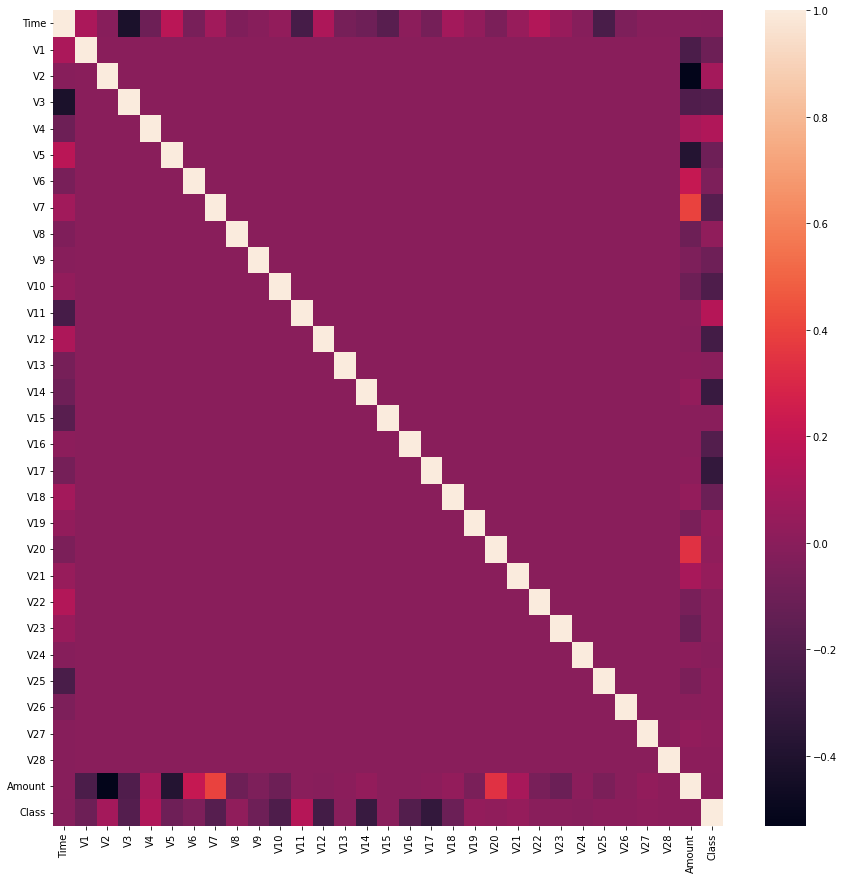


confusion matrix:
 [[85292    13]
 [   50    88]]
Logistic Regression Recall:  0.6376811594202898
Logistic Regression Precision:  0.8712871287128713
Logistic Regression F1_score:  0.7364016736401673 


confusion matrix:
 [[85303     2]
 [   39    99]]
SVC Recall:  0.717391304347826
SVC Precision:  0.9801980198019802
SVC F1_score:  0.8284518828451881 


confusion matrix:
 [[85300     5]
 [   26   112]]
Random Forest Recall:  0.8115942028985508
Random Forest Precision:  0.9572649572649573
Random Forest F1_score:  0.8784313725490197 



In [16]:
import pandas as pd
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Try: warnings.filterwarnings('ignore', 'Solver terminated early.*')

d=pd.read_csv('creditcard.csv')
print("Data set rows:",d.shape[0],"Data set columns:",d.shape[1])
print("#Transaction Class Normal: ", d.Class.value_counts()[0])
print("#Transaction Class Fraud: ", d.Class.value_counts()[1])
plt.figure(figsize=(15,15))
sns.heatmap(d.corr())
plt.show()

X=d.drop(columns=['Class'])
Y=d['Class']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_std , Y, random_state=40, test_size=0.3)

lr=LogisticRegression(max_iter=1000, random_state=41)
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print('\nconfusion matrix:\n',confusion_matrix(Y_test,Y_pred))
Rec = recall_score(Y_test, Y_pred, average = 'binary')
Prec = precision_score(Y_test, Y_pred, average = 'binary')
F1 = f1_score(Y_test, Y_pred, average = 'binary')
print("Logistic Regression Recall: ",  Rec)
print("Logistic Regression Precision: ", Prec)
print("Logistic Regression F1_score: ",  F1, "\n")

svc=SVC(max_iter=500, gamma='scale', random_state=42)
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('\nconfusion matrix:\n',confusion_matrix(Y_test,Y_pred))
Rec = recall_score(Y_test, Y_pred, average = 'binary')
Prec = precision_score(Y_test, Y_pred, average = 'binary')
F1 = f1_score(Y_test, Y_pred, average = 'binary')
print("SVC Recall: ",  Rec)
print("SVC Precision: ", Prec)
print("SVC F1_score: ",  F1, "\n")

rf=RandomForestClassifier(random_state=43)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print('\nconfusion matrix:\n',confusion_matrix(Y_test,Y_pred))
Rec = recall_score(Y_test, Y_pred, average = 'binary')
Prec = precision_score(Y_test, Y_pred, average = 'binary')
F1 = f1_score(Y_test, Y_pred, average = 'binary')
print("Random Forest Recall: ",  Rec)
print("Random Forest Precision: ", Prec)
print("Random Forest F1_score: ",  F1, "\n")